In [1]:
# Set up imports
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from pathlib import Path
import seaborn as sns
import os

In [2]:
#set a custom palette for vizualizations

# custom pallette instructions for matplotlib from https://www.google.com/search?client=firefox-b-1-d&q=how+to+change+matplotlib+color+palette

colors = ["#2568E4", "#1E80C7", "#1697AA", "#0EAF8D", "#06C670", "#36AA60", "#668E50", "#967240", "#C55530"]
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', colors)

In [3]:
# custom pallette instructions for seaborn from https://www.google.com/search?client=firefox-b-1-d&q=seaborn+set+color+palette

# make palette
custom_palette = ["#2568E4", "#1E80C7", "#1697AA", "#0EAF8D", "#06C670", "#36AA60", "#668E50", "#967240", "#C55530"]
# Set the palette
sns.set_palette(custom_palette)

In [4]:
Royal_Blue = "#2568E4"
Steel_Blue = "#1E80C7"
Blue_Munsell = "#1697AA"
Jungle_Green = "#0EAF8D"
Emerald = "#06C670"
Pigment_Green = "#36AA60"
Asparagus = "#668E50"
Golden_Brown = "#967240"
Sinopia = "#C55530"

In [5]:
# Import CSV
filepath = "Resources/student_health_data.csv"
dirty_data = pd.read_csv(filepath)

# Check it
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Heart_Rate                1000 non-null   float64
 4   Blood_Pressure_Systolic   1000 non-null   float64
 5   Blood_Pressure_Diastolic  1000 non-null   float64
 6   Stress_Level_Biosensor    1000 non-null   float64
 7   Stress_Level_Self_Report  1000 non-null   float64
 8   Physical_Activity         1000 non-null   object 
 9   Sleep_Quality             1000 non-null   object 
 10  Mood                      1000 non-null   object 
 11  Study_Hours               1000 non-null   float64
 12  Project_Hours             1000 non-null   float64
 13  Health_Risk_Level         1000 non-null   object 
dtypes: float6

In [6]:
# This cell brought to you by Xpert AI

# Create the output directory if it doesn't exist
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

In [7]:
dirty_data.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate


In [8]:
clean_data = dirty_data

In [9]:
clean_data.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate


In [10]:
# Pull a new DF that shows stress-related variables
stress_df = pd.DataFrame({
    "Heart_Rate": clean_data.Heart_Rate,
    "Blood_Pressure_Systolic": clean_data.Blood_Pressure_Systolic,
    "Blood_Pressure_Diastolic": clean_data.Blood_Pressure_Diastolic,
    "Stress_Level_Biosensor": clean_data.Stress_Level_Biosensor,
    "Stress_Level_Self_Report": clean_data.Stress_Level_Self_Report,
    "Sleep_Quality": clean_data.Sleep_Quality,
    "Mood": clean_data.Mood,
    "Study_Hours": clean_data.Study_Hours,
    "Project_Hours": clean_data.Project_Hours,
    "Health_Risk_Level": clean_data.Health_Risk_Level
})

stress_df.head()    

,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,50.663217,122.173015,84.419860,3.137350,9.028669,Moderate,Happy,34.520973,16.800956,Moderate
1,57.926042,110.778407,75.696145,3.699078,5.819697,Good,Stressed,16.763846,15.791154,Moderate
2,59.294219,109.375673,83.803814,6.785156,5.892360,Moderate,Happy,44.203798,25.678437,Moderate
3,76.826232,125.142227,78.091587,6.408509,6.884001,Poor,Happy,21.776645,20.808391,High
4,68.342769,107.515592,80.674937,7.264719,4.483450,Poor,Happy,8.964999,15.194045,Moderate


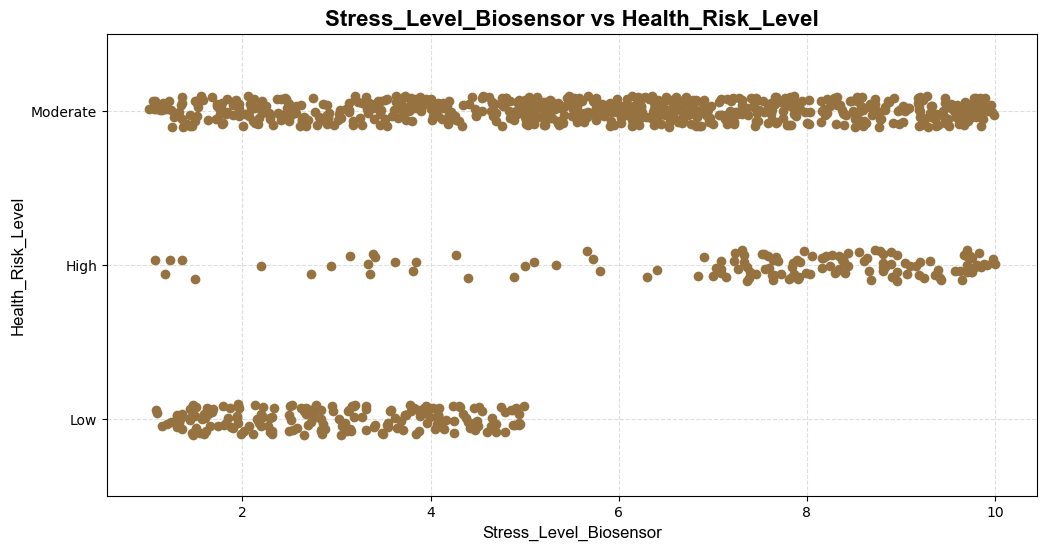

In [11]:
x_label = "Stress_Level_Biosensor"
y_label = "Health_Risk_Level"


# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.stripplot(data=stress_df, y=y_label, x =x_label, color=Golden_Brown, s=7)


# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

title=f"{x_label} vs {y_label} strip chart"
# Save the figure
plt.savefig(os.path.join(output_dir, title))
# Show/Save the Graph
plt.show()

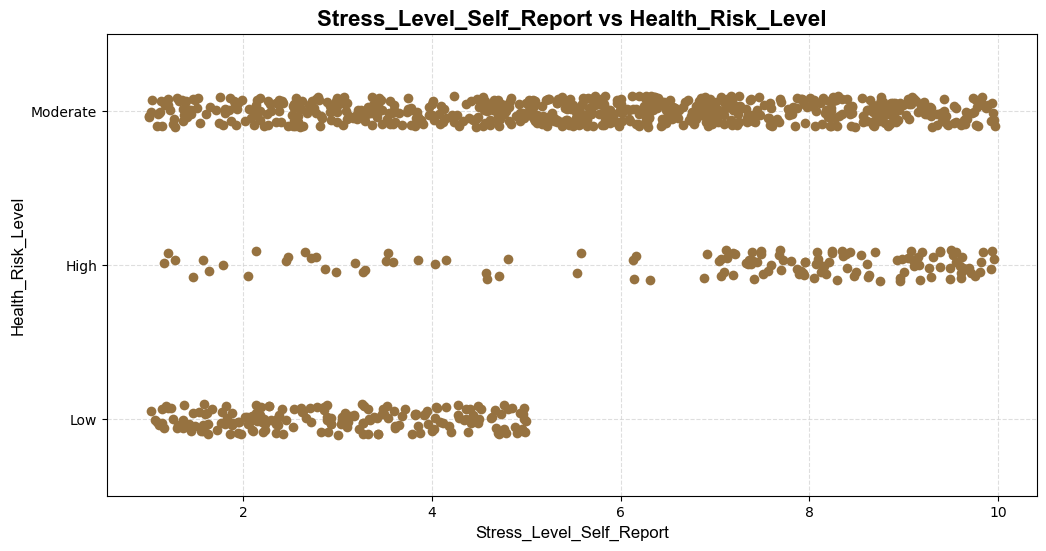

In [12]:
x_label = "Stress_Level_Self_Report"
y_label = "Health_Risk_Level"


# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.stripplot(data=stress_df, y=y_label, x =x_label, color=Golden_Brown, s=7)


# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

title=f"{x_label} vs {y_label} strip chart"
# Save the figure
plt.savefig(os.path.join(output_dir, title))

# Show/Save the Graph
plt.show()

In [13]:
Stress_Level_Biosensor_mean = stress_df.groupby("Health_Risk_Level").Stress_Level_Biosensor.mean()


Stress_Level_Biosensor_mean

Health_Risk_Level
High        7.513085
Low         2.999760
Moderate    5.769567
Name: Stress_Level_Biosensor, dtype: float64

In [14]:
Stress_Level_Self_Report_mean = clean_data.groupby("Health_Risk_Level").Stress_Level_Self_Report.mean()

Stress_Level_Self_Report_mean

Health_Risk_Level
High        7.191850
Low         2.965759
Moderate    5.663141
Name: Stress_Level_Self_Report, dtype: float64

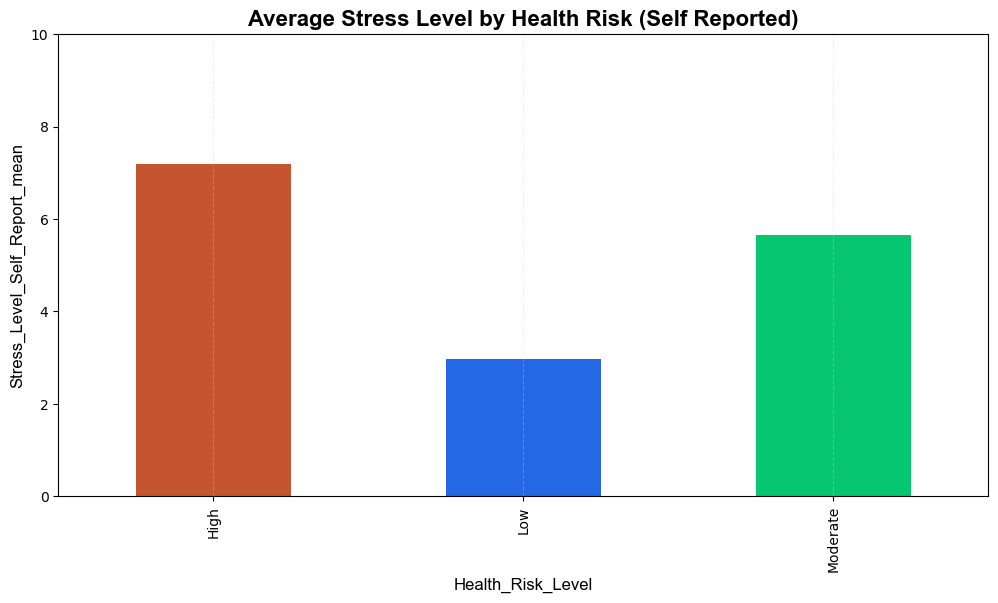

In [15]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a bar chart
Stress_Level_Self_Report_mean.plot(kind='bar', color=[Sinopia, Royal_Blue, Emerald])

# Incorporate the other graph properties
# Add in reference lines
# Add Labels/Title
plt.xlabel("Health_Risk_Level", fontfamily="Arial", fontsize=12)
plt.ylabel("Stress_Level_Self_Report_mean", fontfamily="Arial", fontsize=12)
title = "Average Stress Level by Health Risk (Self Reported)"
plt.title("Average Stress Level by Health Risk (Self Reported)", fontweight="bold", fontsize=16, fontfamily="Arial")
# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.3)
plt.ylim(0, 10)

# Save the figure
plt.savefig(os.path.join(output_dir, title))

# Show plot
plt.show()

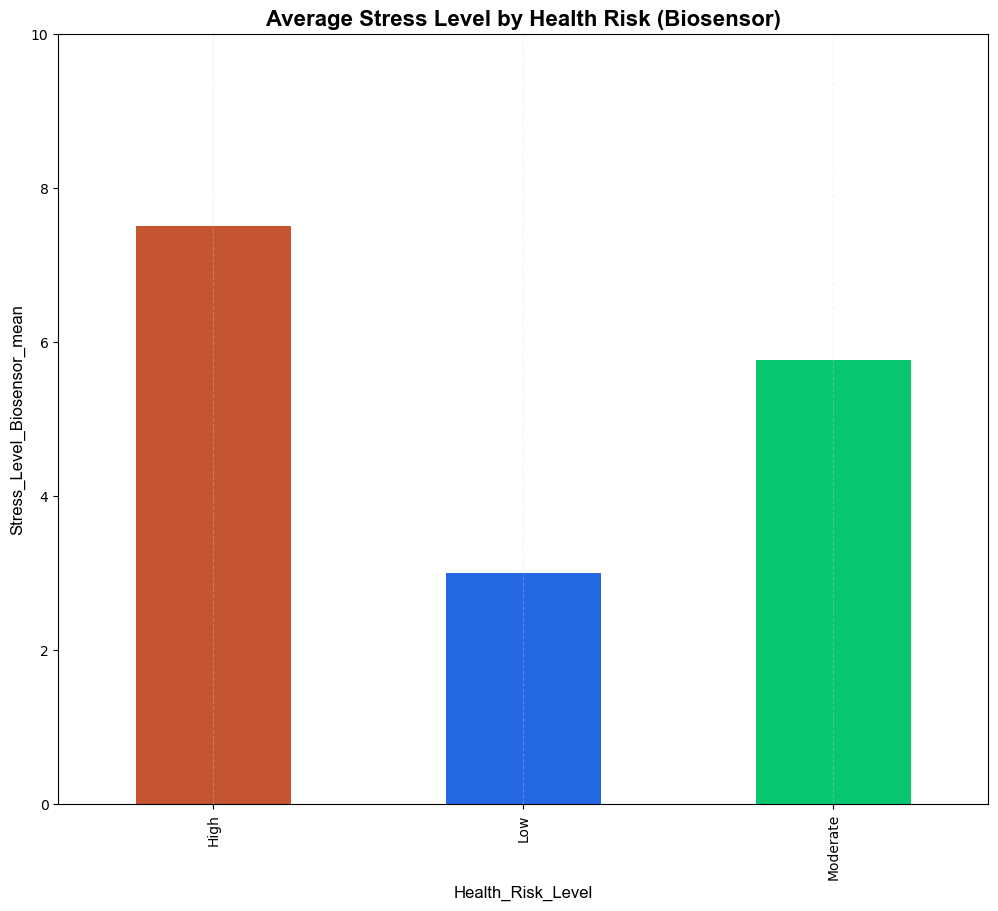

In [16]:
# Change Canvas Size
plt.figure(figsize=(12, 10))

# Create a bar chart
Stress_Level_Biosensor_mean.plot(kind='bar', color=[Sinopia, Royal_Blue, Emerald])

# Incorporate the other graph properties
# Add in reference lines
# Add Labels/Title
plt.xlabel("Health_Risk_Level", fontfamily="Arial", fontsize=12)
plt.ylabel("Stress_Level_Biosensor_mean", fontfamily="Arial", fontsize=12)
title = "Average Stress Level by Health Risk (Biosensor)"
plt.title("Average Stress Level by Health Risk (Biosensor)", fontweight="bold", fontsize=16, fontfamily="Arial")
# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.3)
plt.ylim(0, 10)

# Save the figure
plt.savefig(os.path.join(output_dir, title))

# Show plot
plt.show()

In [17]:
stress_df.head()

,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,50.663217,122.173015,84.419860,3.137350,9.028669,Moderate,Happy,34.520973,16.800956,Moderate
1,57.926042,110.778407,75.696145,3.699078,5.819697,Good,Stressed,16.763846,15.791154,Moderate
2,59.294219,109.375673,83.803814,6.785156,5.892360,Moderate,Happy,44.203798,25.678437,Moderate
3,76.826232,125.142227,78.091587,6.408509,6.884001,Poor,Happy,21.776645,20.808391,High
4,68.342769,107.515592,80.674937,7.264719,4.483450,Poor,Happy,8.964999,15.194045,Moderate


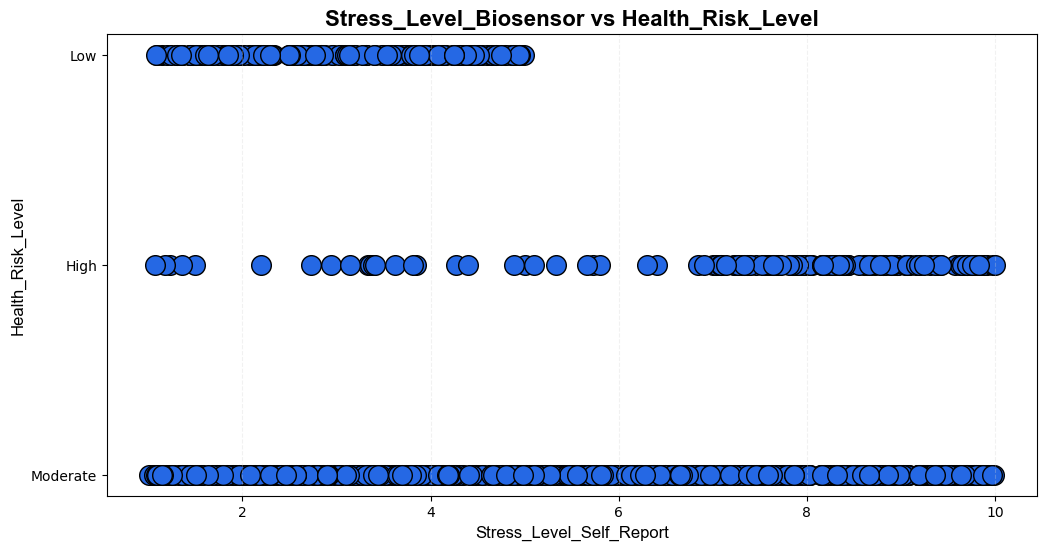

In [18]:
# make a scatter plot
x = stress_df.Stress_Level_Biosensor
y = stress_df.Health_Risk_Level
x_label = "Stress_Level_Biosensor"
y_label = "Health_Risk_Level"
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(x, y, edgecolor="black", s=200)

# Incorporate the other graph properties
# Add in reference lines
# Add Labels/Title
plt.xlabel("Stress_Level_Self_Report", fontfamily="Arial", fontsize=12)
plt.ylabel("Health_Risk_Level", fontfamily="Arial", fontsize=12)
title = f"{x_label} vs {y_label}"
plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")
# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.3)

# Save the figure
plt.savefig(os.path.join(output_dir, title))

# Show plot
plt.show()

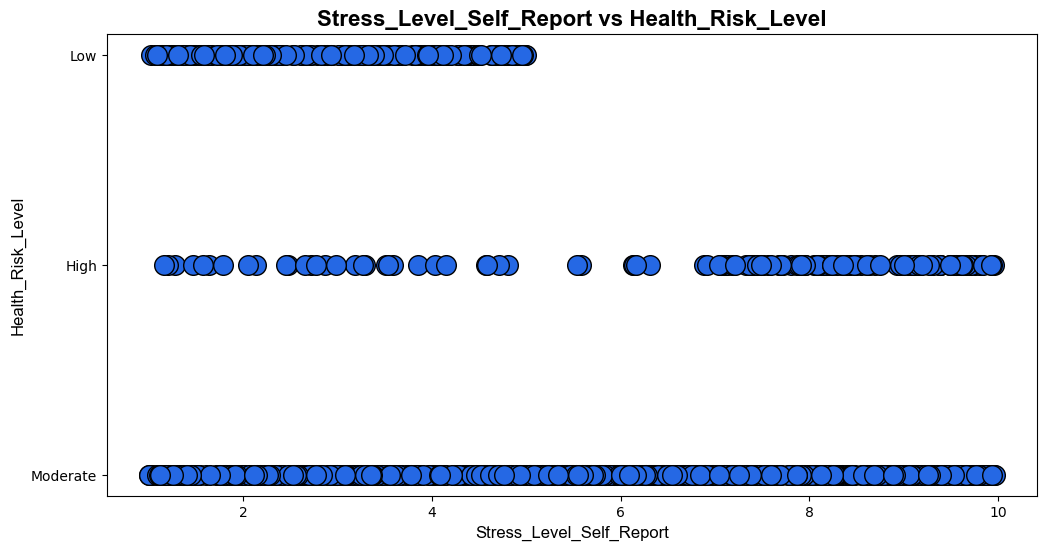

In [19]:
# make a scatter plot
x = stress_df.Stress_Level_Self_Report
y = stress_df.Health_Risk_Level
x_label = "Stress_Level_Self_Report"
y_label = "Health_Risk_Level"
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(x, y, edgecolor="black", s=200)

# Invert the y-axis
#plt.gca().invert_yaxis() # Thanks Xpert

# Incorporate the other graph properties
# Add in reference lines
# Add Labels/Title
plt.xlabel("Stress_Level_Self_Report", fontfamily="Arial", fontsize=12)
plt.ylabel("Health_Risk_Level", fontfamily="Arial", fontsize=12)
plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

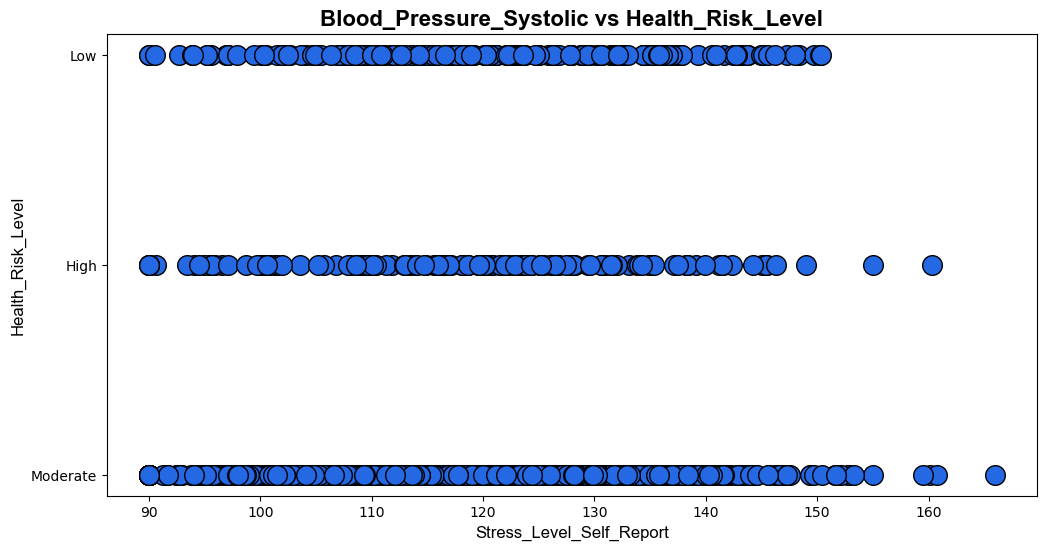

In [20]:
# make a scatter plot
x = stress_df.Blood_Pressure_Systolic
y = stress_df.Health_Risk_Level
x_label = "Blood_Pressure_Systolic"
y_label = "Health_Risk_Level"
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(x, y, edgecolor="black", s=200)

# Invert the y-axis
#plt.gca().invert_yaxis() # Thanks Xpert

# Incorporate the other graph properties
# Add in reference lines
# Add Labels/Title
plt.xlabel("Stress_Level_Self_Report", fontfamily="Arial", fontsize=12)
plt.ylabel("Health_Risk_Level", fontfamily="Arial", fontsize=12)
plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

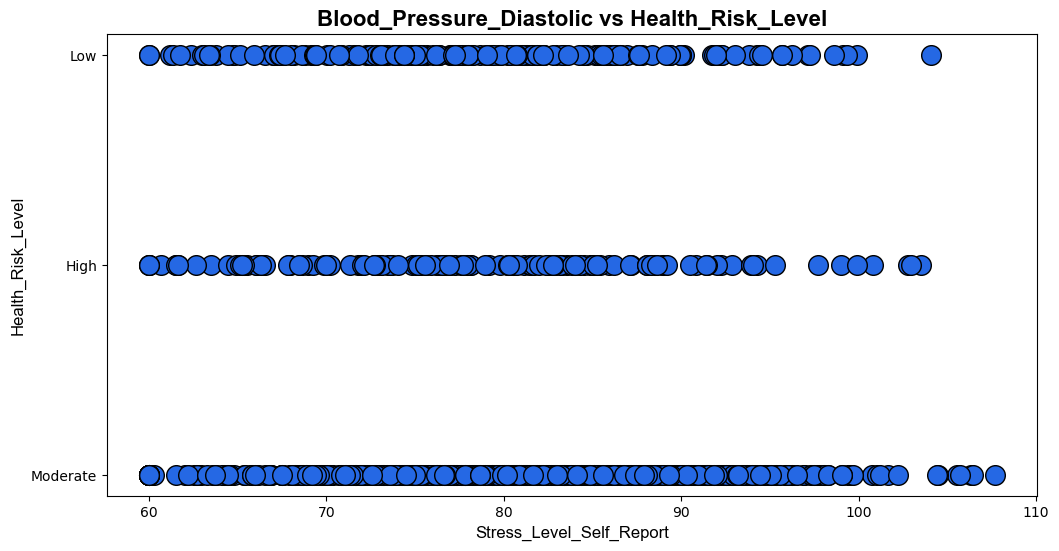

In [21]:
# make a scatter plot
x = stress_df.Blood_Pressure_Diastolic
y = stress_df.Health_Risk_Level
x_label = "Blood_Pressure_Diastolic"
y_label = "Health_Risk_Level"
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(x, y, edgecolor="black", s=200)

# Invert the y-axis
#plt.gca().invert_yaxis() # Thanks Xpert

# Incorporate the other graph properties
# Add in reference lines
# Add Labels/Title
plt.xlabel("Stress_Level_Self_Report", fontfamily="Arial", fontsize=12)
plt.ylabel("Health_Risk_Level", fontfamily="Arial", fontsize=12)
title = f"{x_label} vs {y_label}"
plt.title(title, fontweight="bold", fontsize=16, fontfamily="Arial")

# Save the figure
plt.savefig(os.path.join(output_dir, title))

# Show plot
plt.show()


In [22]:
# This cell brought to you by Xpert AI

#map categorical data to numerical so that regression can be run
mood_mapping = {
    'Stressed': 0,
    'Neutral': .5,
    'Happy': 1
    }

stress_df.Mood = stress_df.Mood.map(mood_mapping)

In [23]:
# This cell brought to you by Xpert AI
health_mapping = {
    'Low': 0,
    'Moderate': .5,
    'High': 1
    }

stress_df.Health_Risk_Level = stress_df.Health_Risk_Level.map(health_mapping)

In [24]:
# This cell brought to you by Xpert AI
sleep_mapping = {
    'Poor': 0,
    'Moderate': .5,
    'Good': 1
    }

stress_df.Sleep_Quality = stress_df.Sleep_Quality.map(sleep_mapping)

In [25]:
# Define a function to create Linear Regression plots
def do_regression_plot(x, y, x_label, y_label, annotation, color):  
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"rvalue = {rvalue}")
    print(line_eq)

    # make a scatter plot

    # Change Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x, y, color={color}, edgecolor="black", s=200)
    plt.plot(x, regress_values, color="black", linewidth=6) # the regression line
    
    # Incorporate the other graph properties
    # Add in reference lines
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    title = f"{x_label} vs {y_label}"
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")

    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")
    
    # Save the figure
    plt.savefig(os.path.join(output_dir, title))
    
    # Show plot
    plt.show()

In [26]:
stress_df.head()

,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,50.663217,122.173015,84.419860,3.137350,9.028669,0.5,1.0,34.520973,16.800956,0.5
1,57.926042,110.778407,75.696145,3.699078,5.819697,1.0,0.0,16.763846,15.791154,0.5
2,59.294219,109.375673,83.803814,6.785156,5.892360,0.5,1.0,44.203798,25.678437,0.5
3,76.826232,125.142227,78.091587,6.408509,6.884001,0.0,1.0,21.776645,20.808391,1.0
4,68.342769,107.515592,80.674937,7.264719,4.483450,0.0,1.0,8.964999,15.194045,0.5


rvalue = -0.031565921855130595
y = -0.0x + 0.54


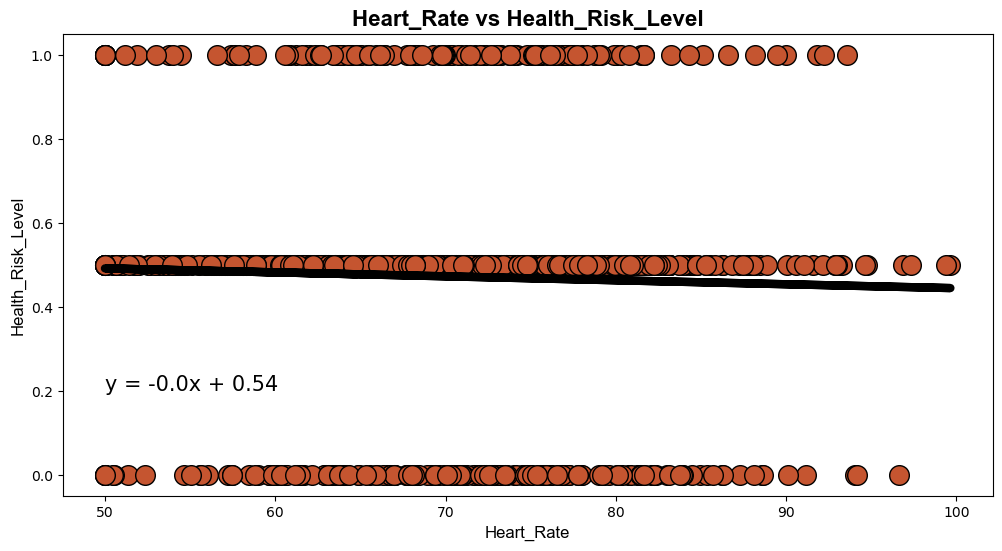

In [27]:
x = stress_df.Heart_Rate
y = stress_df.Health_Risk_Level
x_label = "Heart_Rate"
y_label = "Health_Risk_Level"
annotation = (50, 0.2)
color = Sinopia


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = -0.025918798309236185
y = -0.0x + 0.53


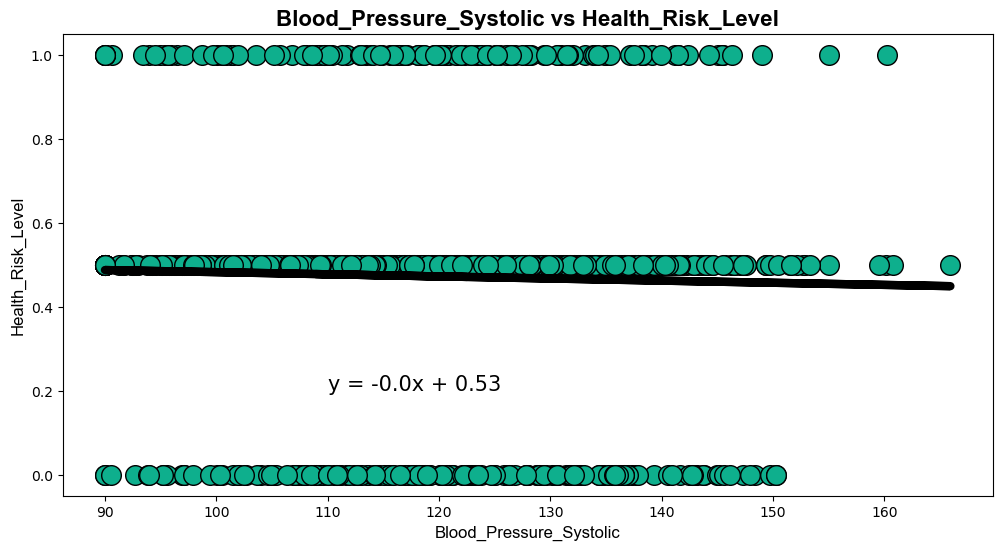

In [28]:
x = stress_df.Blood_Pressure_Systolic
y = stress_df.Health_Risk_Level
x_label = "Blood_Pressure_Systolic"
y_label = "Health_Risk_Level"
annotation = (110, 0.2)
color = Jungle_Green


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = -0.0061844991128103075
y = -0.0x + 0.49


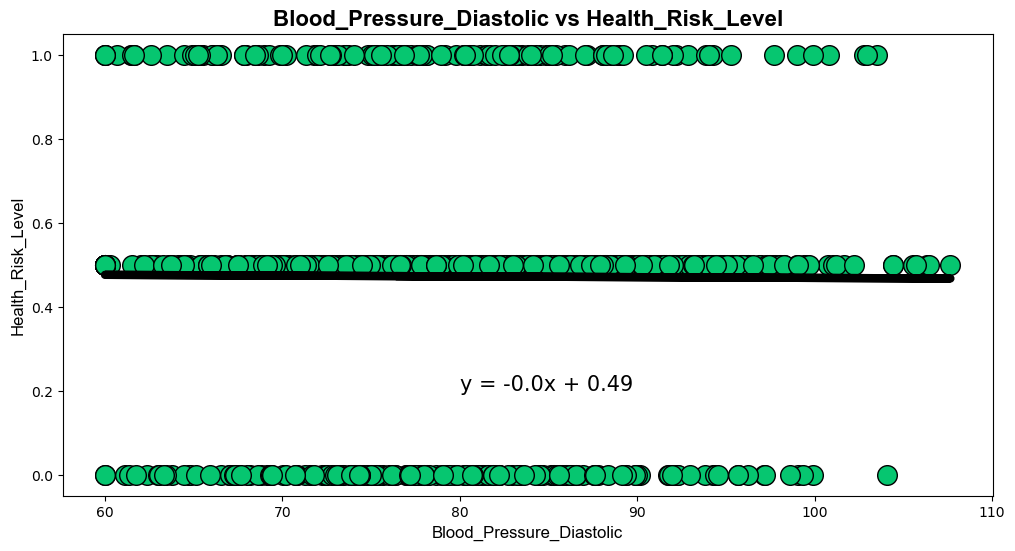

In [29]:
x = stress_df.Blood_Pressure_Diastolic
y = stress_df.Health_Risk_Level
x_label = "Blood_Pressure_Diastolic"
y_label = "Health_Risk_Level"
annotation = (80, 0.2)
color = Emerald


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = 0.5081376109045227
y = 0.06x + 0.17


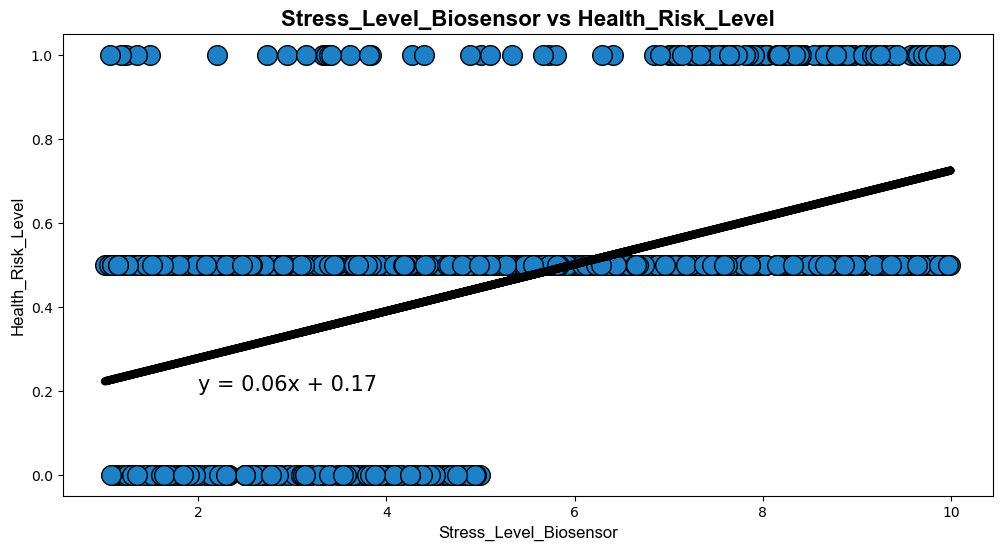

In [30]:
x = stress_df.Stress_Level_Biosensor
y = stress_df.Health_Risk_Level
x_label = "Stress_Level_Biosensor"
y_label = "Health_Risk_Level"
annotation = (2, 0.2)
color = Steel_Blue


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = 0.48682587167616487
y = 0.05x + 0.18


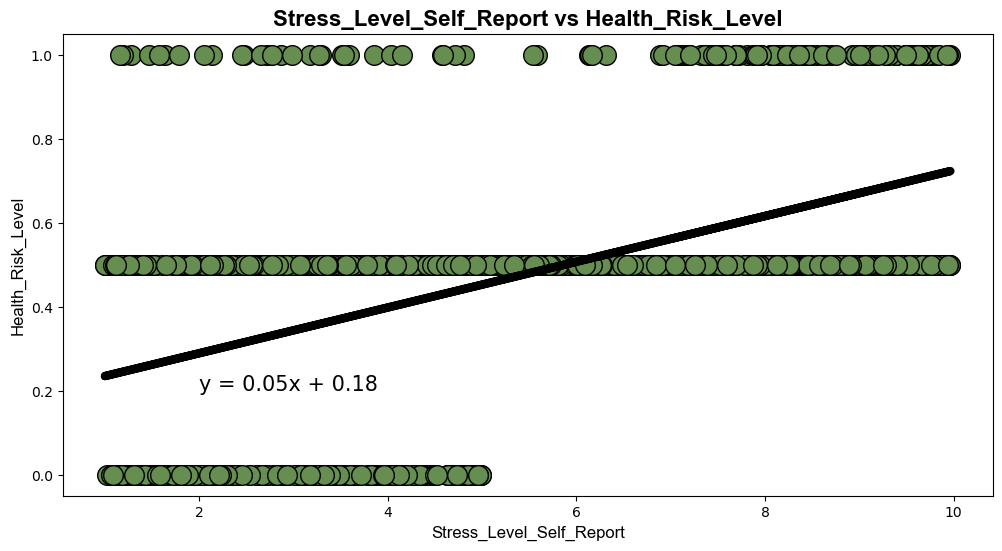

In [31]:
x = stress_df.Stress_Level_Self_Report
y = stress_df.Health_Risk_Level
x_label = "Stress_Level_Self_Report"
y_label = "Health_Risk_Level"
annotation = (2, 0.2)
color = Asparagus


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = -0.1618522224403182
y = -0.12x + 0.55


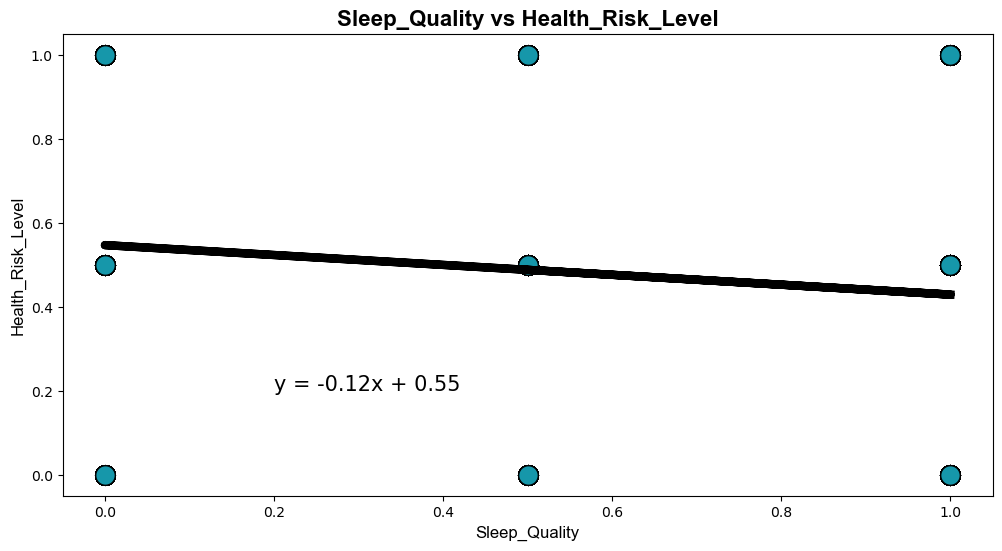

In [32]:
x = stress_df.Sleep_Quality
y = stress_df.Health_Risk_Level
x_label = "Sleep_Quality"
y_label = "Health_Risk_Level"
annotation = (0.2, 0.2)
color = Blue_Munsell


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = 0.03598307897669257
y = 0.03x + 0.46


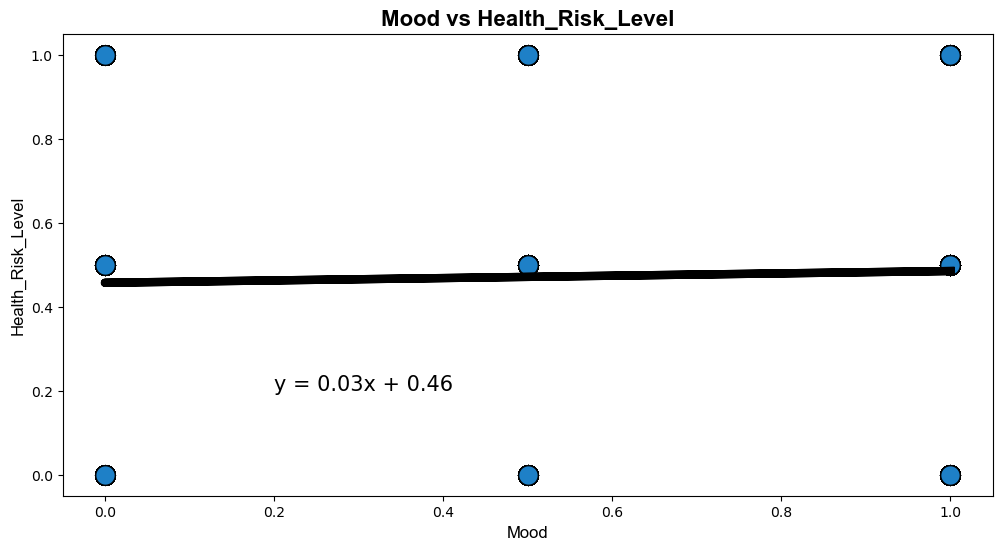

In [33]:
x = stress_df.Mood
y = stress_df.Health_Risk_Level
x_label = "Mood"
y_label = "Health_Risk_Level"
annotation = (0.2, 0.2)
color = Steel_Blue


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = -0.029185899848117553
y = -0.0x + 0.5


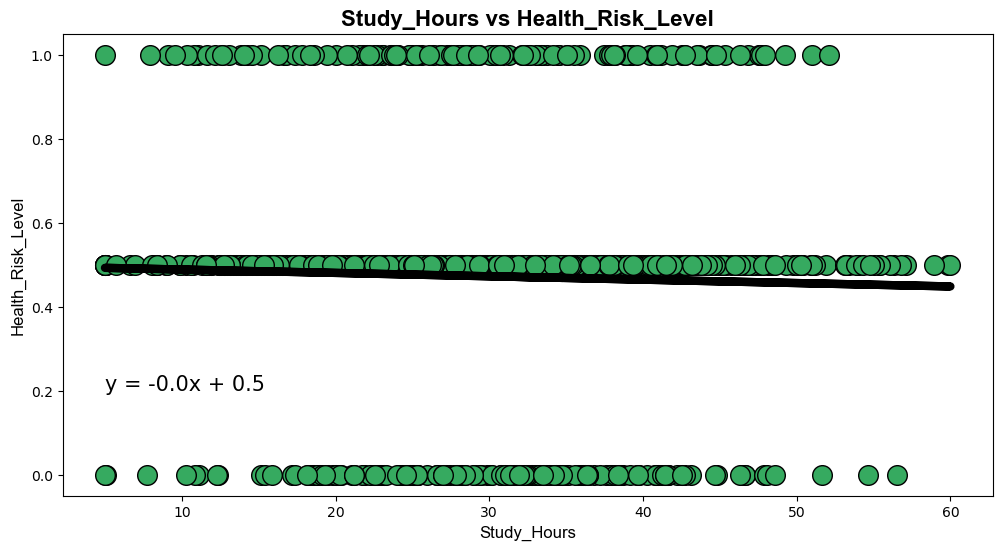

In [34]:
x = stress_df.Study_Hours
y = stress_df.Health_Risk_Level
x_label = "Study_Hours"
y_label = "Health_Risk_Level"
annotation = (5, 0.2)
color = Pigment_Green


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = 0.014723836033779011
y = 0.0x + 0.46


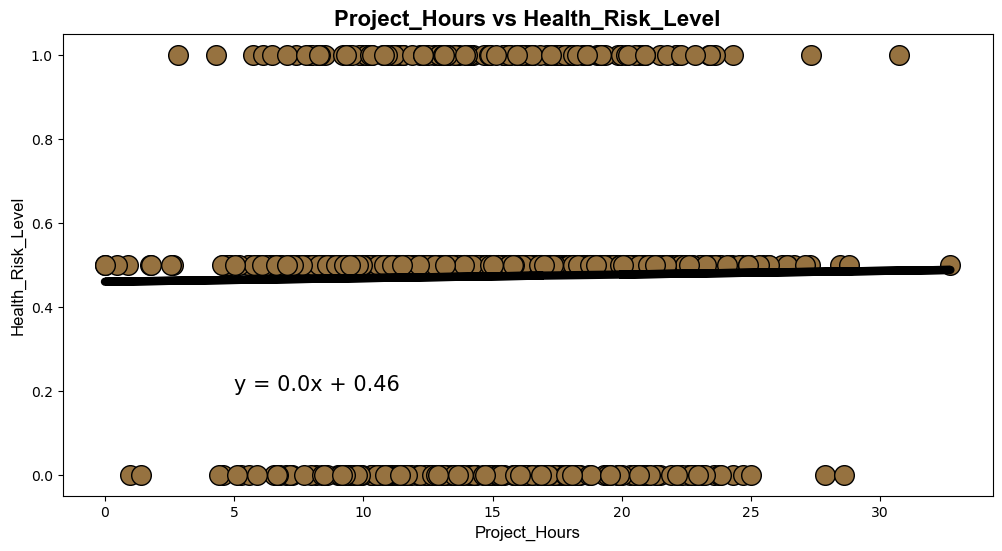

In [35]:
x = stress_df.Project_Hours
y = stress_df.Health_Risk_Level
x_label = "Project_Hours"
y_label = "Health_Risk_Level"
annotation = (5, 0.2)
color = Golden_Brown


do_regression_plot(x, y, x_label, y_label, annotation, color)

In [36]:
corrs = stress_df.corr()
corrs

,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
Heart_Rate,1.000000,0.010487,-0.029246,0.045965,-0.030244,0.013073,0.006758,0.042154,0.002522,-0.031566
Blood_Pressure_Systolic,0.010487,1.000000,0.023070,-0.029756,-0.024142,0.019597,0.050629,-0.004735,-0.031142,-0.025919
Blood_Pressure_Diastolic,-0.029246,0.023070,1.000000,-0.003564,-0.013975,0.009135,-0.005814,-0.009838,-0.025889,-0.006184
Stress_Level_Biosensor,0.045965,-0.029756,-0.003564,1.000000,-0.025881,0.041389,-0.003741,-0.029895,0.007518,0.508138
Stress_Level_Self_Report,-0.030244,-0.024142,-0.013975,-0.025881,1.000000,-0.029302,0.019973,-0.004504,0.025306,0.486826
Sleep_Quality,0.013073,0.019597,0.009135,0.041389,-0.029302,1.000000,-0.026096,-0.016803,0.058283,-0.161852
Mood,0.006758,0.050629,-0.005814,-0.003741,0.019973,-0.026096,1.000000,0.024212,0.052340,0.035983
Study_Hours,0.042154,-0.004735,-0.009838,-0.029895,-0.004504,-0.016803,0.024212,1.000000,-0.039647,-0.029186
Project_Hours,0.002522,-0.031142,-0.025889,0.007518,0.025306,0.058283,0.052340,-0.039647,1.000000,0.014724
Health_Risk_Level,-0.031566,-0.025919,-0.006184,0.508138,0.486826,-0.161852,0.035983,-0.029186,0.014724,1.000000


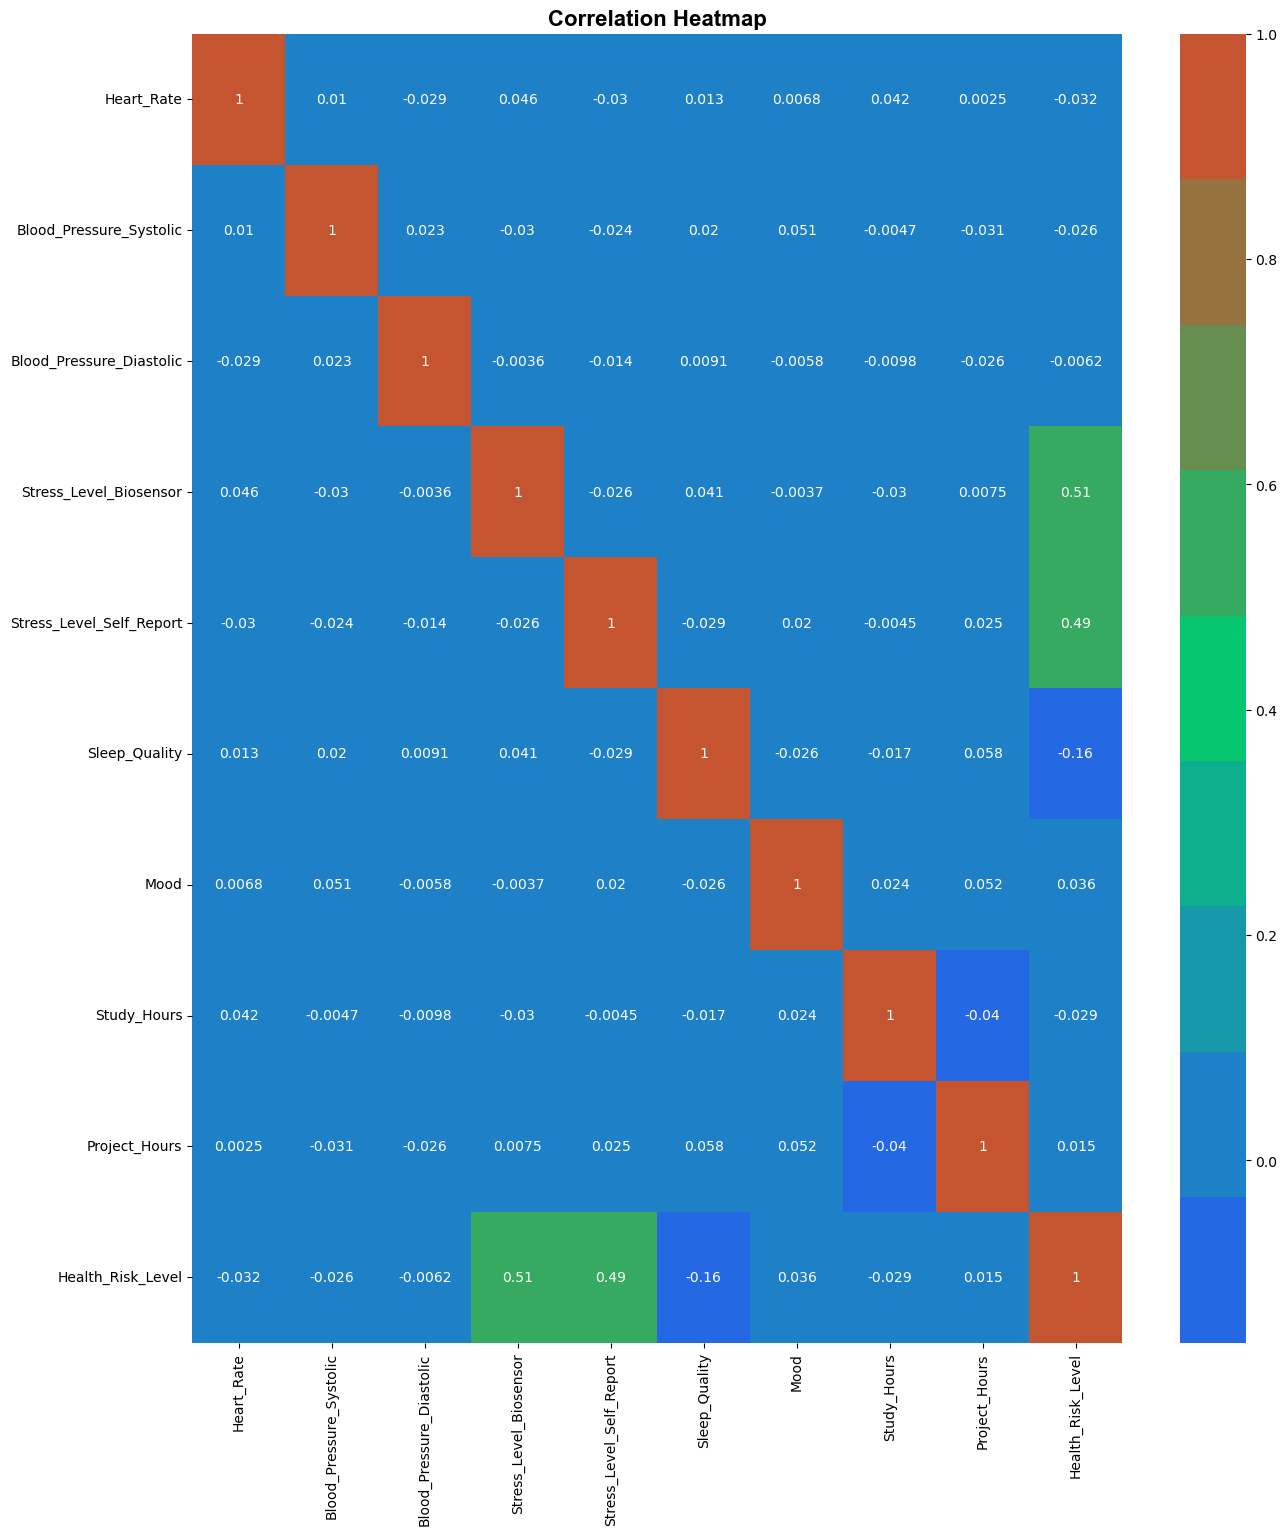

In [37]:
# Change Canvas Size
plt.figure(figsize=(15, 17))


# Create a basic plot
sns.heatmap(corrs, annot=True, cmap = custom_palette)
# Customization
plt.title("Correlation Heatmap", fontweight="bold", fontsize=16, fontfamily="Arial")

# Show/Save the Graph
plt.savefig(os.path.join(output_dir, "big_heatmap"))
plt.show()

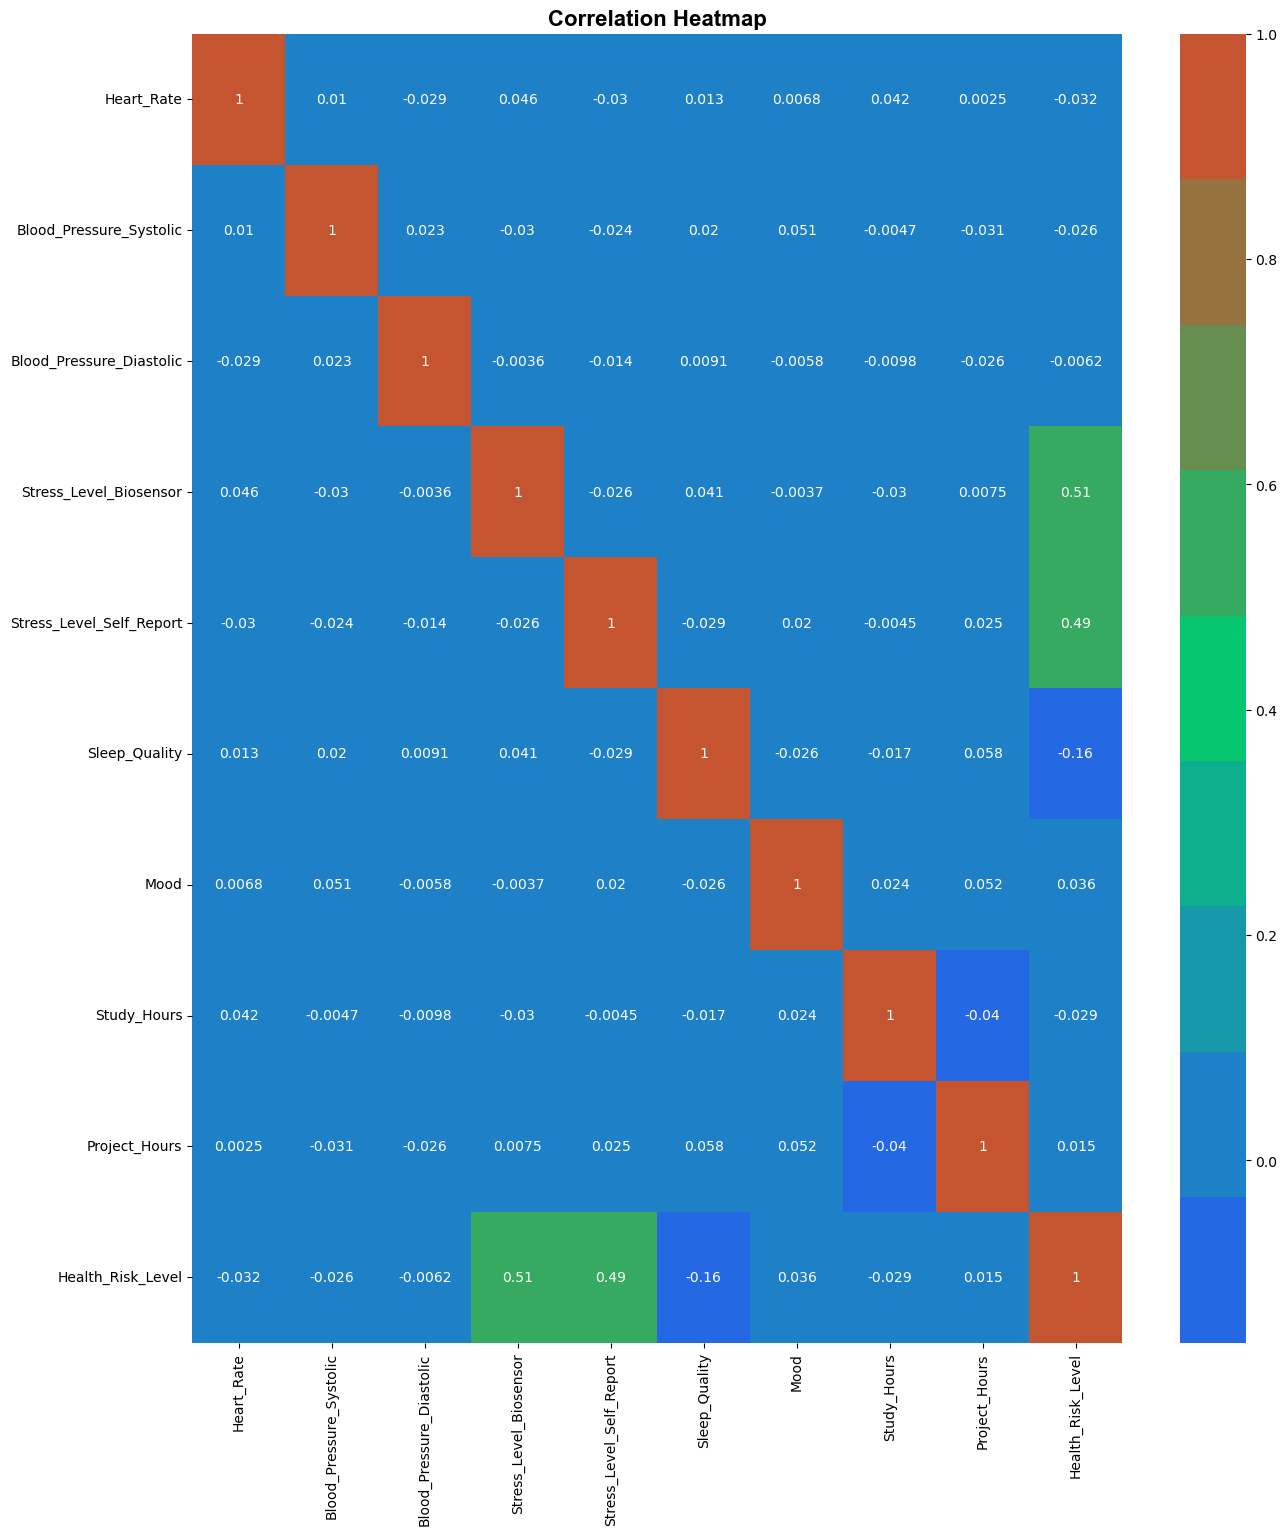

In [38]:
# Change Canvas Size
plt.figure(figsize=(15, 17))

# Create a basic plot
sns.heatmap(corrs, annot=True, cmap = custom_palette)
# Customization
plt.title("Correlation Heatmap", fontweight="bold", fontsize=16, fontfamily="Arial")

# Show/Save the Graph
plt.savefig(os.path.join(output_dir, "stress_heatmap"))
plt.show()

rvalue = -0.025881169907851425
y = -0.03x + 5.5


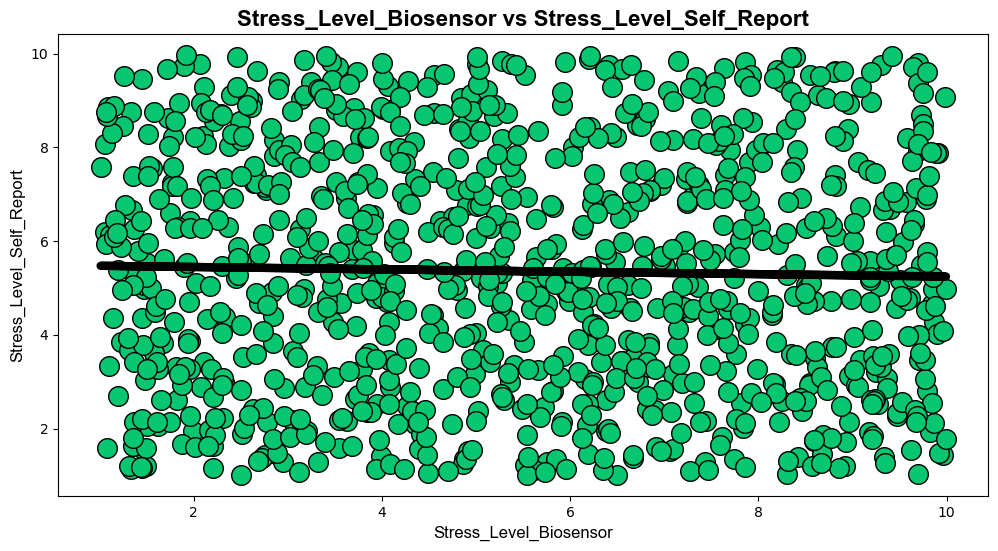

In [39]:
x = stress_df.Stress_Level_Biosensor
y = stress_df.Stress_Level_Self_Report
x_label = "Stress_Level_Biosensor"
y_label = "Stress_Level_Self_Report"
annotation = (0.2, 0.2)
color = Emerald


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = -0.025881169907851425
y = -0.03x + 5.5


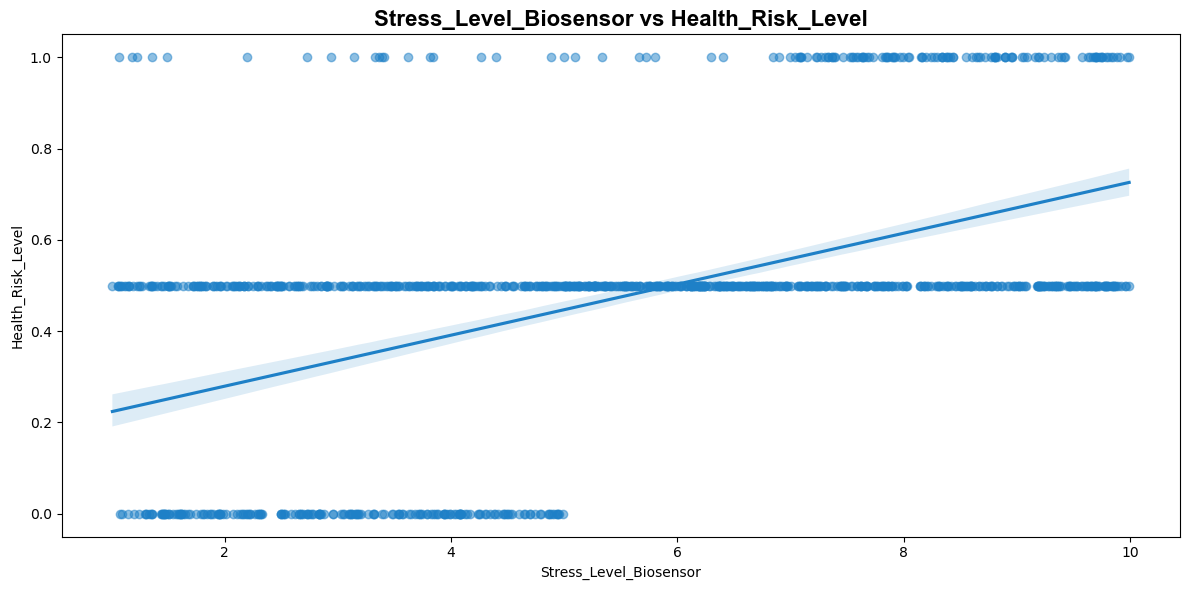

In [40]:
x_label = "Stress_Level_Biosensor"
y_label = "Health_Risk_Level"

# do regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept # these are the points/predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"rvalue = {rvalue}")
print(line_eq)

# Create scatter plots for stress levels vs. study hours with regression lines
plt.figure(figsize=(12, 6))

# Stress_Level_Biosensor) vs Health_Risk_Level
#plt.subplot(1, 2, 2)
sns.regplot(x='Stress_Level_Biosensor', y='Health_Risk_Level', data=stress_df, scatter_kws={'alpha':0.5}, color=Steel_Blue)
plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.tight_layout()
plt.show()

## Discussion: 

#### The only strong correlation this data suggests is between stress level and health risk level. Self reported stress levels and biosensor stress levels were very close, which means that self-reports were relatively accurate. Subjects with higher biosensor stress levels had a slight tendency to self report lower stress levels. This data suggests that higher stress leads to an increased Health Risk Level and that people experiencing high stress tend to understimate the amount of stress they experience. 